# Beschreibung

Im Folgenden werden die Filialverkäufe der Dirk Rossmann GmBH in 1.115 Filialen deskriptiv beschrieben. Die Umsätze der Filialen werden von verschiedenen Faktoren wie Sonderangebote, Wettbewerb, Schul- und Feiertage, Saisonabhängigkeit und Standort beeinflusst. Die Datensätze sollen unterscuht werden sowie die Korrelationen ermittelt. Zur Verfügung stehen die Rossmann Store Sales, welche im Rahmen eines Wettbewerbs auf der Plattform Kaggle öffentlich zugänglich sind. Die Daten bestehen aus den drei Comma-Separated-Values-(CSV)-Tabellen train, test und store. Die train.csv enthält historische Verkaufsdaten, während die test.csv historische Daten ohne Verkäufe beinhaltet. Die store.csv umfasst ergänzende Informationen zu den 1.115 Filialen.

Die in den Datensätzen vorkommenden Datentypen mit den entsprechenden Wertebereichen sind folgende:
- int64 (8 Bytes): -9.223.372.036.854.775.808 bis 9.223.372.036.854.775.807
- float64
- datetime64
- object (4 Bytes auf einer 32.Bit Plattform; 8 Bytes auf einer 64-Bit-Plattform)

Quelle: https://learn.microsoft.com/de-de/dotnet/visual-basic/language-reference/data-types/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_store = "../data/store.csv"
file_train = "../data/train.csv"
file_test = "../data/test.csv"

In [4]:
df_store = pd.read_csv(file_store, delimiter=",", encoding="latin", header=0, thousands=",", decimal='.', low_memory=False)
df_train = pd.read_csv(file_train, delimiter=",", encoding="latin", header=0, thousands=",", decimal='.', low_memory=False)
df_test = pd.read_csv(file_test, delimiter=",", encoding="latin", header=0, thousands=",", decimal='.', low_memory=False)

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Datenanalyse Store

Die store.csv Datei hat insgesamt 1.115 Zeilen und 10 Spalten, d.h. es gibt 1.115 Filialen der Dirk Rossmann GmbH.

Die Datenfelder der store.csv sind:

Store
- eine eindeutige ID für jeden Store
- dtype: int64
- unique values: 1,    2,    3, ..., 1113, 1114, 1115

StoreTypes
- unterscheidet zwischen 4 verschiedenen Store-Modellen: a,b,c,d
- dtype: object
- unique values: c', 'a', 'd', 'b'

Assortment
- beschreibt eine Sortiementsstufe  
- a = Basic, b = extra, c = erweitert
- dtype: object
- unique values: 'a', 'c', 'b'

CompetitionDistance
- Entfernung in Metern zum nächsten Geschäft des Mitbewerbers
- dtype: float64 --> Int64
- unique values: 20 - 75860

CompetitionOpenSinceMonth
- gibt den ungefähren Monat an, in dem der nächste Konkurrent eröffnet wurde
- dtype: float64 --> Int64
- unique values: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, <NA>

CompetitionOpenSinceYear
- gibt das ungefähre Jahr an, in dem der nächste Konkurrent eröffnet wurde
- dtype: float64 --> Int64
- unique values: 1900, 1961, 1990, 1994, 1995 ,1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005 ,2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, <NA>

Promo2
- ist eine fortlaufende und aufeinanderfolgende Aktion für einige Geschäfte 
- 0 = Filiale nimmt nicht teil, 1 = Filiale nimmt teil
- dtype: int64
- unique values: 0, 1

Promo2SinceWeek
- beschreibt die Kalenderwoche, in der das Geschäft mit der Teilnahme an Promo2 begonnen hat
- dtype: float64 --> Int64
- unique values: 1, 5, 6, 9, 10, 13, 14, 18, 22, 23, 26, 27, 28, 31, 35, 36, 37, 39, 40, 44, 45, 48, 49, 50, <NA>

Promo2SinceYear
- beschreibt das Jahr, in der das Geschäft mit der Teilnahme an Promo2 begonnen hat
- dtype: float64 --> Int64
- unique values: 2009, 2010, 2011, 2012, 2013, 2014, 2015, <NA>

PromoInterval
- beschreibt die aufeinanderfolgenden Intervalle, in denen Promo2 gestartet wird, und benennt die Monate, in denen die Aktion neu gestartet wird
- Beispielsweise bedeutet „Feb,Mai,Aug,Nov“ jede Runde beginnt im Februar, Mai, August, November eines beliebigen Jahres für diesen Shop.
- dtype: object
- unique values: nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'

Es gibt somit 5 Datenfeld des Typs float64, 2 Datenfelder des Typs int64 und 3 Datenfelder des Typs object. Aufgrund der Werte in den Spalten CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek und Promo2SinceYear werden die Datentypen jeweils in ein Integer Array umgeandelt. Die Umwandlung der Datentypen ist in der Liste Datenfelder durch Pfeile markiert.

In [6]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


In [7]:
df_store.shape

(1115, 10)

In [8]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
df_store = df_store.astype({"CompetitionDistance": 'Int64', "CompetitionOpenSinceMonth": 'Int64', "CompetitionOpenSinceYear": 'Int64', "Promo2SinceWeek": 'Int64', "Promo2SinceYear": 'Int64'})

In [10]:
df_store['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [11]:
df_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [12]:
df_store['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

In [13]:
df_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [14]:
df_store['CompetitionOpenSinceMonth'].unique()

<IntegerArray>
[9, 11, 12, 4, 10, 8, <NA>, 3, 6, 5, 1, 2, 7]
Length: 13, dtype: Int64

In [15]:
df_store['CompetitionOpenSinceYear'].unique()

<IntegerArray>
[2008, 2007, 2006, 2009, 2015, 2013, 2014, 2000, 2011, <NA>, 2010, 2005, 1999,
 2003, 2012, 2004, 2002, 1961, 1995, 2001, 1990, 1994, 1900, 1998]
Length: 24, dtype: Int64

In [16]:
df_store['Promo2'].unique()

array([0, 1], dtype=int64)

In [17]:
df_store['Promo2SinceWeek'].unique()

<IntegerArray>
[<NA>,   13,   14,    1,   45,   40,   26,   22,    5,    6,   10,   31,   37,
    9,   39,   27,   18,   35,   23,   48,   36,   50,   44,   49,   28]
Length: 25, dtype: Int64

In [18]:
df_store['Promo2SinceYear'].unique()

<IntegerArray>
[<NA>, 2010, 2011, 2012, 2009, 2014, 2015, 2013]
Length: 8, dtype: Int64

In [19]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

Insgesamt gibt es 2.343 fehlerhafte Werte in der Datei store.csv. In der Spalte CompetitionDistance sind 3 Werte fehlerhaft, in der Spalte CompetitionOpenSinceMonth 354 Werte und in der Spalte CompetitionDistanceYear ebenfalls  354 Werte. Die Spalten Promo2SinceWeek, Promo2SinceYear und PromoInterval weisen jeweils 544 Werte fehlerhafte Werte auf. Die drei fehlerhaften Werte der Spalte CompetitionDistance sind zur beispielhaften Darstellung einer fehlerhaften Zeile dargestellt.

In [20]:
df_store.isna().sum().sum()

2343

In [21]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
df_store[df_store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,<NA>,<NA>,<NA>,0,<NA>,<NA>,NaN
621,622,a,c,<NA>,<NA>,<NA>,0,<NA>,<NA>,NaN
878,879,d,a,<NA>,<NA>,<NA>,1,5,2013,"Feb,May,Aug,Nov"


Die describe-Funktion gibt eine statistische Zusammenfassung der Spalten des Store Datensatzes. Es können die Nicht-Null-Werte (count), der Mittelwert (mean), die Standardabweichung (std), der Minimalwert (min), das 25%-Qunatil (25%), der Median (50%), das 75%-Quantil (75%) und der Maximalwert (max) je Spalte abgelesen werden. 

In [23]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


# Datenanalyse Train

Die train.csv Datei besteht aus 1.017.209 Zeilen und 9 Spalten.

Die Datenfelder der train.csv sind:
Store
- eine eindeutige ID für jeden Store
- dtype: int64
- unique values: 1 - 1115

DayOfWeek
- Wochentag des Verkaufs
- dtype: int64
- unique values: 1, 2, 3, 4, 5, 6, 7

Date
- Datum des Verkaufs
- dtype: object --> datetime64[ns]
- unique values: 2013-01-01 00:00:00 - 2015-07-31 00:00:00

Sales
- Umsatz für einen bestimmten Tag
- dtype: int64
- unique values: 0 - 41551

Customers
- Anzahl der Kunden an einem bestimmten Tag
- dtype: int64
- unique values: 0 - 7388

Open
- Indikator, ob das Geschäft geöffnet war 
- 0 = geschlossen, 1 = geöffnet
- dtype: int64
- unique values: 1, 0

Promo
- gibt an, ob in einem geschäft an diesem Tag eine Promo läuft
- dtype: int64
- unique values: 1, 0

StateHoliday
- zeigt einen staatlichen Feiertag an (Normalerweise sind alle Geschäfte, mit wenigen Ausnahmen, an staatlichen Feiertagen geschlossen)
- 0 = Keine, a = gesetzlicher Feiertag, b = Osterferien, c = Weihnachten 
- dtype: object
- unique values: '0', 'a', 'b', 'c'

SchoolHoliday
- gibt an, ob (Geschäft, Datum) von der Schließung öffentlicher Schulen betroffen war
- dtype: int64
- unique values: 1, 0

Insgesamt sind 7 Datenfelder vom Typ int64 und 2 vom Typ object. Aufgrund, dass es sich bei der Spalte Date um ein Datum handelt, wird der Datentyp von object zu datetime64[ns] umgewandelt. Die Umwandlung ist in der Liste Datenfelder durch den Pfeil erkennbar. 

In [24]:
df_train.shape

(1017209, 9)

In [25]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [27]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [28]:
df_train['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [29]:
df_train['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [30]:
df_train['Date'].unique()

<DatetimeArray>
['2015-07-31 00:00:00', '2015-07-30 00:00:00', '2015-07-29 00:00:00',
 '2015-07-28 00:00:00', '2015-07-27 00:00:00', '2015-07-26 00:00:00',
 '2015-07-25 00:00:00', '2015-07-24 00:00:00', '2015-07-23 00:00:00',
 '2015-07-22 00:00:00',
 ...
 '2013-01-10 00:00:00', '2013-01-09 00:00:00', '2013-01-08 00:00:00',
 '2013-01-07 00:00:00', '2013-01-06 00:00:00', '2013-01-05 00:00:00',
 '2013-01-04 00:00:00', '2013-01-03 00:00:00', '2013-01-02 00:00:00',
 '2013-01-01 00:00:00']
Length: 942, dtype: datetime64[ns]

In [31]:
df_train['Sales'].unique()

array([ 5263,  6064,  8314, ...,   660, 17815, 23303], dtype=int64)

In [32]:
df_train['Customers'].unique()

array([ 555,  625,  821, ..., 3900,   36, 4065], dtype=int64)

In [33]:
df_train['Open'].unique()

array([1, 0], dtype=int64)

In [34]:
df_train['Promo'].unique()

array([1, 0], dtype=int64)

In [35]:
df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)
df_train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [36]:
df_train['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

Die Datei train.csv enthält keine fehlerhaften Werte.

In [37]:
df_train.isna().sum().sum()

0

Die describe-Funktion wird für die Spalten Store, Sales und Customers ausgeführt. 

In [38]:
df_train[['Store', 'Sales', 'Customers']].describe()

,Store,Sales,Customers
count,1017209.00,1017209.00,1017209.00
mean,558.43,5773.82,633.15
std,321.91,3849.93,464.41
min,1.00,0.00,0.00
25%,280.00,3727.00,405.00
50%,558.00,5744.00,609.00
75%,838.00,7856.00,837.00
max,1115.00,41551.00,7388.00


# Datenanalyse Test

Die test.csv Datei besteht aus 41.088 Zeilen und 8 Spalten. 
Die Datenfelder der train.csv sind:
Store
- eine eindeutige ID für jeden Store
- dtype: int64
- unique values: 1 - 1115

DayOfWeek
- Wochentag des Verkaufs
- dtype: int64
- unique values: 1, 2, 3, 4, 5, 6, 7

Date
- Datum des Verkaufs
- dtype: object --> datetime64[ns]
- unique values: 2013-01-01 00:00:00 - 2015-07-31 00:00:00

Sales
- Umsatz für einen bestimmten Tag
- dtype: int64
- unique values: 0 - 41551

Customers
- Anzahl der Kunden an einem bestimmten Tag
- dtype: int64
- unique values: 0 - 7388

Open
- Indikator, ob das Geschäft geöffnet war 
- 0 = geschlossen, 1 = geöffnet
- dtype: float64 --> Int64
- unique values: 1, 0

Promo
- gibt an, ob in einem geschäft an diesem Tag eine Promo läuft
- dtype: int64
- unique values: 1, 0

StateHoliday
- zeigt einen staatlichen Feiertag an (Normalerweise sind alle Geschäfte, mit wenigen Ausnahmen, an staatlichen Feiertagen geschlossen)
- 0 = Keine, a = gesetzlicher Feiertag, b = Osterferien, c = Weihnachten 
- dtype: object
- unique values: '0', 'a', 'b', 'c'

SchoolHoliday
- gibt an, ob (Geschäft, Datum) von der Schließung öffentlicher Schulen betroffen war
- dtype: int64
- unique values: 1, 0

Insgesamt sind 5 Datenfelder vom Typ int64, 1 vom Typ float64 und 2 vom Typ object. Aufgrund, dass es sich bei der Spalte Date um ein Datum handelt, wird der Datentyp von object zu datetime64[ns] umgewandelt. Ebenso wurde der Datentyp der Spalte Open von float64 zu Int64 umgewandelt. Die Umwandlung ist in der Liste Datenfelder durch den Pfeil erkennbar. 

In [39]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.00,1,0,0
1,2,3,4,2015-09-17,1.00,1,0,0
2,3,7,4,2015-09-17,1.00,1,0,0
3,4,8,4,2015-09-17,1.00,1,0,0
4,5,9,4,2015-09-17,1.00,1,0,0


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [41]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Open'] = df_test['Open'].astype('Int64')

In dem Datensatz Test gibt es insgesamt 11 fehlerhafte Werte, wobei alle in der Spalte Open zu finden sind. 

In [42]:
df_test.isna().sum().sum()

11

In [43]:
df_test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [44]:
df_test['Open'].unique()

<IntegerArray>
[1, <NA>, 0]
Length: 3, dtype: Int64

In [45]:
df_test['Open'].value_counts()

Open
1    35093
0     5984
Name: count, dtype: Int64

In [46]:
df_test[df_test['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,<NA>,1,0,0
1335,1336,622,3,2015-09-16,<NA>,1,0,0
2191,2192,622,2,2015-09-15,<NA>,1,0,0
3047,3048,622,1,2015-09-14,<NA>,1,0,0
4759,4760,622,6,2015-09-12,<NA>,0,0,0
5615,5616,622,5,2015-09-11,<NA>,0,0,0
6471,6472,622,4,2015-09-10,<NA>,0,0,0
7327,7328,622,3,2015-09-09,<NA>,0,0,0
8183,8184,622,2,2015-09-08,<NA>,0,0,0
9039,9040,622,1,2015-09-07,<NA>,0,0,0


Die describe-Funktion beschreibt die Spalten der test.csv durch statistische Maße.

In [47]:
df_test.describe()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday
count,41088.00,41088.00,41088.00,41088,41077.00,41088.00,41088.00
mean,20544.50,555.90,3.98,2015-08-24 12:00:00,0.85,0.40,0.44
min,1.00,1.00,1.00,2015-08-01 00:00:00,0.00,0.00,0.00
25%,10272.75,279.75,2.00,2015-08-12 18:00:00,1.00,0.00,0.00
50%,20544.50,553.50,4.00,2015-08-24 12:00:00,1.00,0.00,0.00
75%,30816.25,832.25,6.00,2015-09-05 06:00:00,1.00,1.00,1.00
max,41088.00,1115.00,7.00,2015-09-17 00:00:00,1.00,1.00,1.00
std,11861.23,320.27,2.02,NaN,0.35,0.49,0.50


# Korrelation

Nachdem die Datensätze beschrieben und analysiert wurden können die Korrelationen der Merkmale untersucht werden. Hierfür werden für den train und store Datensatz jeweils eine Korrealtionsmatrix erzeugt. Diese stellt die Korrelationen innerhalb des Datensatzes dar. Darauffolgend werden die beiden Datensatz zusammengeführt, sodass Korrelationen zwischen den Datensätzen betrachtet werden können. Bei postiven Werten zwischen den Spalten besteht ein positiver Zusammenhang, wobei der Wert 1 eine perfekte Korrelation entspricht. Hingegen entsprechen negative Werte ein negativen Zusammenhang, wobei hier der Wert -1 eine perfekte Korrelation darstellt. Der Wert 0 besagt, dass zwischen den Spalten kein Zusammenhang besteht.  

## Korrelation der Train Daten ##

Die Korrelationsmatrix zeigt, dass zwischen Sales und Customers sowie Open, Promo und State_Holiday_0 ein starker bis schwach positiver Zusammenhang besteht. 

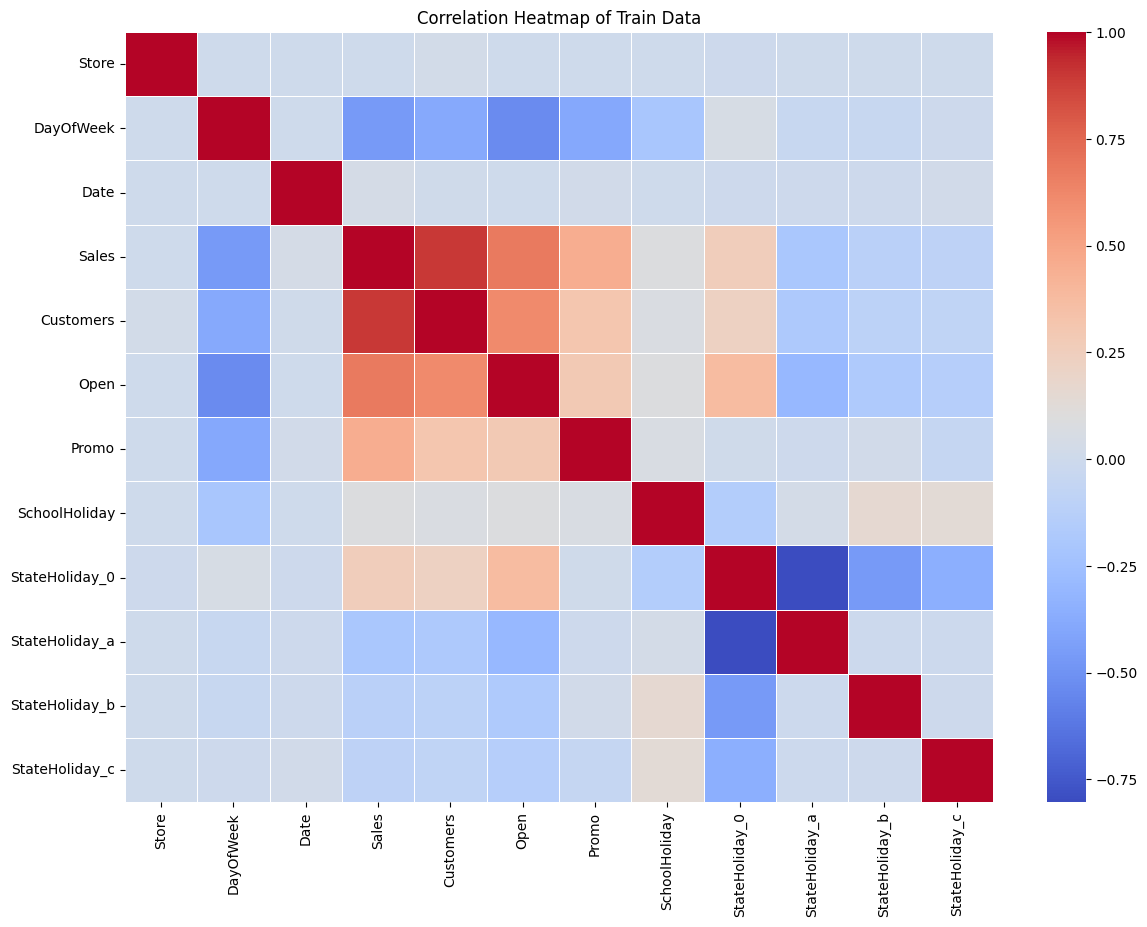

In [48]:
#One-Hot-Encoding for StateHoliday
train_encoded = pd.get_dummies(df_train, columns=['StateHoliday'])

# Correlation matrix for train data
correlation_matrix = train_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Train Data')
plt.show()

## Korrelation der Store Daten ##

Die Korrelationsmatrix der Store Daten zeigt, dass Promo2 positiv mit allen drei Promo-Intervallen korreliert. 

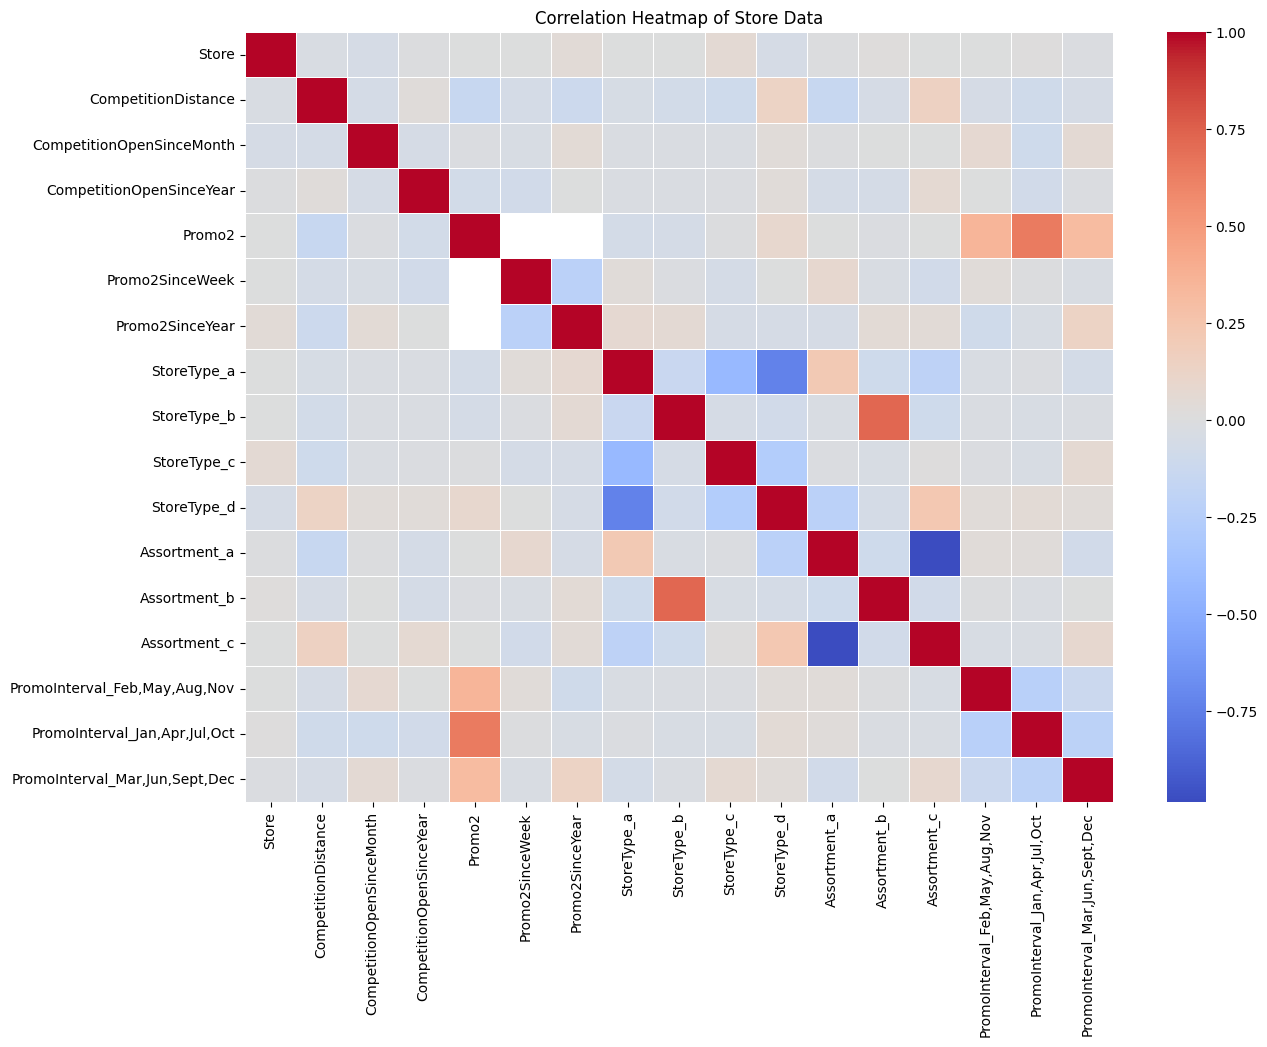

In [49]:
#One-Hot-Encoding for StoreType, Assortment, PromoInterval
store_encoded = pd.get_dummies(df_store, columns=['StoreType', 'Assortment', 'PromoInterval'])

# Correlation matrix for train data
store_correlation_matrix = store_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(store_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Store Data')
plt.show()

## Korrelation der zusammengeführten Daten von Train und Store ##

Die Korrelationsmatrix zeigt folgende Zusammenhänge:

**1. Sales (Umsatz)** 

- Customers (Kunden): Sehr hohe positive Korrelation (~0.85). Dies bedeutet, dass mehr Kunden direkt mit höheren Umsätzen verbunden sind.
- Promo (Promotion): Moderate positive Korrelation (~0.30). Geschäfte, die Promotionen durchführen, tendieren dazu, höhere Umsätze zu erzielen.
- Open (Geöffnet): Positive Korrelation (~0.55). Umsätze werden nur erzielt, wenn das Geschäft geöffnet ist.
- SchoolHoliday (Schulferien): Schwache positive Korrelation (~0.10). Schulferien haben einen geringen positiven Einfluss auf den Umsatz.

StateHoliday (Staatliche Feiertage):

- StateHoliday_0 (kein Feiertag): Schwache positive Korrelation (~0.20). Keine Feiertage führen tendenziell zu höheren Umsätzen.
- StateHoliday_a (öffentlicher Feiertag): Schwache negative Korrelation (~-0.18). Öffentliche Feiertage können den Umsatz leicht senken.
- StateHoliday_b (Osterferien): Sehr schwache negative Korrelation (~-0.01).
- StateHoliday_c (Weihnachten): Schwache negative Korrelation (~-0.05). Weihnachtsfeiertage könnten den Umsatz leicht senken.

**2.	Customers (Kunden)**

- Promo (Promotion): Moderate positive Korrelation (~0.36). Promotionen führen zu einem Anstieg der Kundenzahl.
- Open (Geöffnet): Positive Korrelation (~0.55). Geschäfte, die geöffnet sind, haben mehr Kunden.
- SchoolHoliday (Schulferien): Schwache positive Korrelation (~0.10). Schulferien führen zu einem leichten Anstieg der Kundenzahl.

StateHoliday:

- StateHoliday_0 (kein Feiertag): Schwache positive Korrelation (~0.20).
- StateHoliday_a (öffentlicher Feiertag): Schwache negative Korrelation (~-0.18).
- StateHoliday_b (Osterferien): Sehr schwache negative Korrelation (~-0.01).
- StateHoliday_c (Weihnachten): Schwache negative Korrelation (~-0.05).
	
**3.	CompetitionDistance (Entfernung zum nächsten Konkurrenten)**

- Sales (Umsatz): Sehr schwache negative Korrelation (~-0.07). Eine größere Entfernung zu Konkurrenten führt zu leicht höheren Umsätzen.
- Customers (Kunden): Sehr schwache negative Korrelation (~-0.07). Eine größere Entfernung zu Konkurrenten führt zu leicht mehr Kunden.
	
**4.	CompetitionOpenSince**

- CompetitionOpenSinceMonth (Monat der Eröffnung des nächsten Konkurrenten): Kaum Korrelation mit den meisten Variablen, schwach negativ mit Sales (~-0.01).
- CompetitionOpenSinceYear (Jahr der Eröffnung des nächsten Konkurrenten): Kaum Korrelation mit den meisten Variablen, schwach negativ mit Sales (~-0.04).

**5.	Promo2 (Fortlaufende Promotion)**

- Promo2: Kaum Korrelation mit den meisten Variablen, leicht positiv mit Sales (~0.08).
- Promo2SinceWeek (Woche seit Promo2): Keine signifikante Korrelation.
- Promo2SinceYear (Jahr seit Promo2): Keine signifikante Korrelation.
	
**6.	StoreType (Ladentyp)**

StoreType_a, StoreType_b, StoreType_c, StoreType_d:

- StoreType_a: Schwach negativ korreliert mit Sales (~-0.06).
- StoreType_b: Moderat positiv korreliert mit Sales (~0.20). Dies deutet darauf hin, dass dieser Ladentyp tendenziell höhere Umsätze erzielt.
- StoreType_c: Schwach negativ korreliert mit Sales (~-0.12).
- StoreType_d: Sehr schwach negativ korreliert mit Sales (~-0.03).

**7.	Assortment (Sortiment)**

Assortment_a, Assortment_b, Assortment_c:

- Assortment_a: Schwach negativ korreliert mit Sales (~-0.10).
- Assortment_b: Moderat positiv korreliert mit Sales (~0.14).
- Assortment_c: Schwach negativ korreliert mit Sales (~-0.09).
	
**8.	PromoInterval (Promo-Intervalle)**

- PromoInterval_Feb,May,Aug,Nov: Schwach positiv korreliert mit Sales (~0.05).
- PromoInterval_Jan,Apr,Jul,Oct: Schwach positiv korreliert mit Sales (~0.04).
- PromoInterval_Mar,Jun,Sept,Dec: Schwach positiv korreliert mit Sales (~0.02).

**Fazit**

Es zeigt sich, dass Korrelationen in unterschiedlicher Stärke vorliegen. So korreliert Sales stark positiv mit Customers sowie moderat positiv mit Promo und Open. Eine schwach negative Korrelation weist Sales mit CompetitionDistance und einigen StateHoliday-Kategorien auf. Ebenfalls zeigt Sales verschieden schwache Korrelationen mit StoreType und Assortment. Die Korrelationen zeigen, dass Promotionen und das Öffnen des Geschäfts wichtige Faktoren sind, die den Umsatz steigern. Des Weiteren hat der Ladentyp und Sortimentstyp Einfluss auf die Umsätze. Im Gegensatz dazu hat die Entfernung zu einem Wettbewerber einen geringen negativen Einfluss hinsichtlich des Umsatzes. 

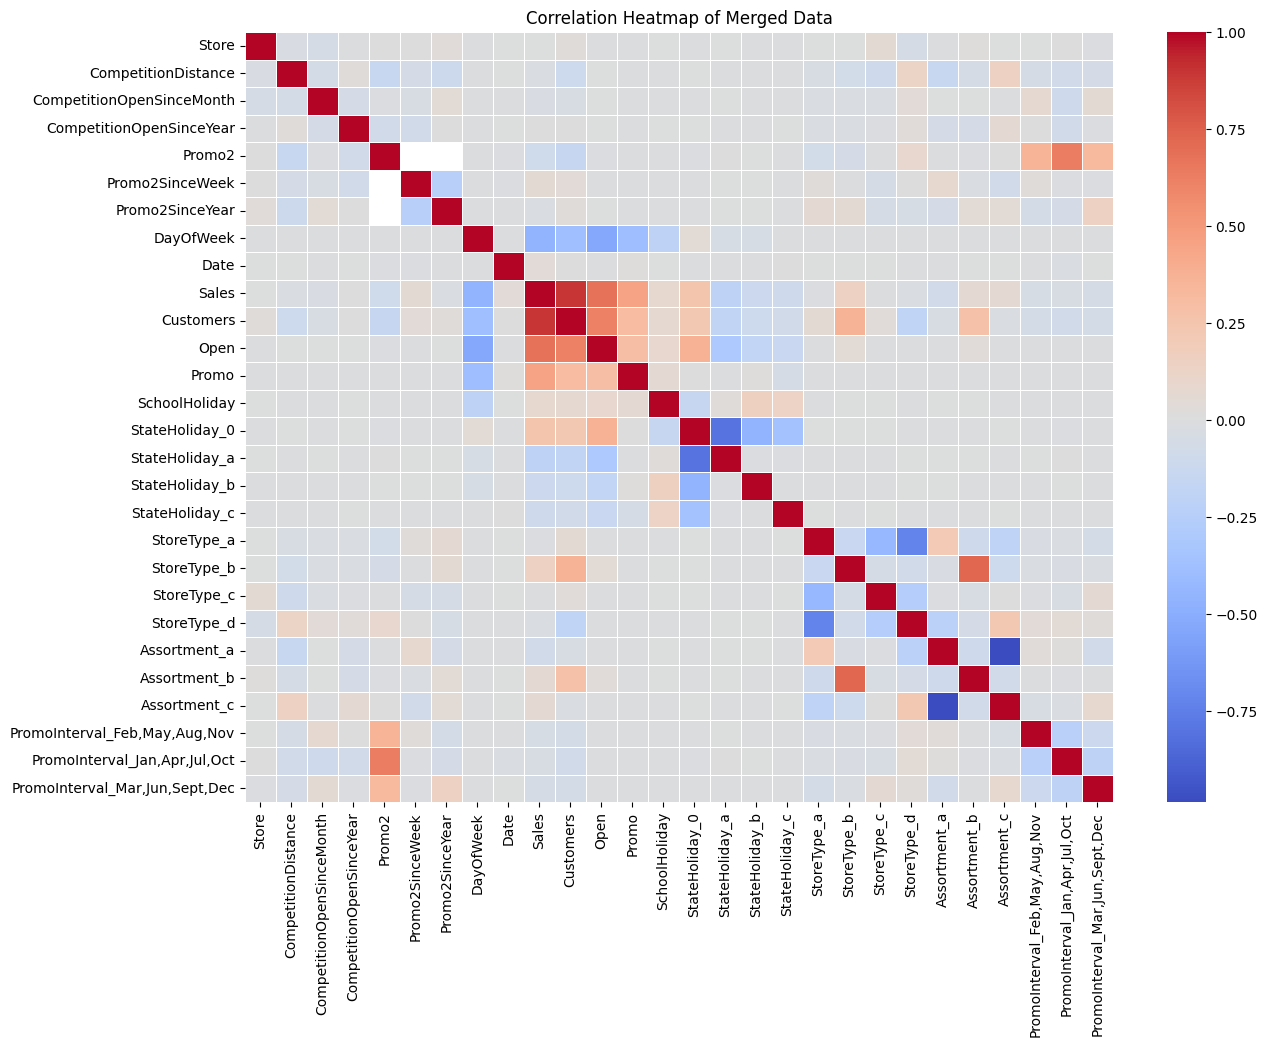

In [50]:
df_merged = pd.merge(df_store, df_train, on='Store')

#One-Hot-Encoding for StateHoliday, StoreTypes, Assortment, PromoInterval
merged_encoded = pd.get_dummies(df_merged, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

# Correlation matrix for train data
merged_correlation_matrix = merged_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(merged_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Merged Data')
plt.show()

In [51]:
df_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270,9,2008,0,<NA>,<NA>,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270,9,2008,0,<NA>,<NA>,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270,9,2008,0,<NA>,<NA>,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270,9,2008,0,<NA>,<NA>,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270,9,2008,0,<NA>,<NA>,NaN,1,2015-07-27,6102,612,1,1,0,1


# Pairplots

### Ein Pairplot wird typischerweise bei einer deskriptiven Analyse verwendet, um die Beziehungen zwischen verschiedenen Variablen in einem Datensatz visuell zu untersuchen. Daher untersuchen wir im folgeneden die gegebenen Variablen auf deren Beziehung zueinander. Ein Pairplot zeigt für jede mögliche Kombination von Variablenpaaren in einem Datensatz eine Streudiagrammmatrix und ermöglicht so eine schnelle visuelle Einsicht in die Datenstruktur. Es ist besonders nützlich, um erste Hypothesen zu überprüfen oder um die Grundlage für weitere fortgeschrittene Analysen zu legen.

## Pairplot Customers, Sales, CompetitionDistance, CompetitionOpenSinceYear, DayOfWeek, Date

Der Pairplot zeigt uns verschiedene Beziehungen zwischen den gegebenen Variablen (Customers, Sales, CompetitionDistance, CompetitionOpenSinceYear, DayOfWeek) und bietet Einblicke in ihre Verteilungen und Korrelationen. Nachfolgend werden einzelne Beziehung und Verteilungen beschrieben:

1. **Beziehung zwischen Customers und Sales**:
    - Es gibt eine deutlich positive Korrelation zwischen der Anzahl der Kunden und dem Umsatz. Das bedeutet, dass ein Anstieg der Kundenzahl in der Regel mit einem Anstieg des Umsatzes einhergeht. **Diese positive Korrelation liegt in allen weiteren Pairplots vor und wird deswegen nicht jedes mal explizit erwähnt.**
    - Es liegt eine lineare Beziehung vor, was darauf hinweist, dass die meisten Geschäfte mehr Umsatz machen, wenn sie mehr Kunden haben.
    
2. **Verteilungen**:
    - Diagonale KDE-Plots: Die diagonalen Plots zeigen die Kernel-Density-Estimates (KDE) der Verteilungen für jede Variable. KDE ist eine Methode zur Schätzung der Wahrscheinlichkeitsdichte einer Zufallsvariablen basierend auf einer Stichprobe von Daten. Vereinfacht gesagt, stellt KDE eine glatte Schätzung der Wahrscheinlichkeitsverteilung der Daten dar, indem es um jeden Datenpunkt herum eine sogenannte Kernfunktion platziert und dann diese Funktionen summiert, um eine kontinuierliche Schätzung zu erzeugen.
    - Customers: Die Kundenanzahl zeigt eine schiefe Verteilung, wobei die meisten Geschäfte eine relativ geringe Anzahl von Kunden haben. Einige Ausreißer mit sehr hohen Kundenzahlen sind ebenfalls erkennbar.
    - Sales: Der Umsatz weist eine ähnliche Verteilung auf wie die Kundenanzahl, was die positive Korrelation zwischen diesen beiden Variablen weiter bestätigt.
    - CompetitionDistance: Diese Variable ist stark schief verteilt, mit den meisten Wettbewerbern in der Nähe und einigen wenigen weit entfernten.
    - CompetitionOpenSinceYear: Die Eröffnungsjahre der Wettbewerber sind breit verteilt, was darauf hinweist, dass einige Wettbewerber schon lange auf dem Markt sind, während andere erst kürzlich eröffnet wurden.
    - DayOfWeek: Die Verteilung der Wochentage ist gleichmäßig, da jeder Tag der Woche (1-7) in ähnlicher Häufigkeit vorkommt.

3. **Weitere Beziehungen**:
    - Customers vs. CompetitionDistance: Es gibt keine klare Korrelation zwischen der Anzahl der Kunden und der Entfernung zum nächsten Wettbewerber.
    - Sales vs. CompetitionDistance: Ähnlich wie bei den Kunden zeigt auch der Umsatz keine deutliche Korrelation mit der Wettbewerbsentfernung.
    - Customers vs. CompetitionOpenSinceYear: Es ist keine klare Beziehung zwischen der Anzahl der Kunden und dem Eröffnungsjahr der Wettbewerber erkennbar.
    - Sales vs. CompetitionOpenSinceYear: Auch hier gibt es keine deutliche Korrelation.
    - Customers vs. DayOfWeek: Die Anzahl der Kunden variiert je nach Wochentag, wobei einige Tage tendenziell mehr Kunden anziehen.
    - Sales vs. DayOfWeek: Der Umsatz variiert ebenfalls je nach Wochentag, was wahrscheinlich mit der Kundenanzahl zusammenhängt.
    - Insgesamt zeigt der Pairplot wichtige Korrelationen, insbesondere zwischen der Anzahl der Kunden und dem Umsatz, während andere Variablen wie die Entfernung zum Wettbewerb und das Eröffnungsjahr der Wettbewerber weniger Einfluss auf Kundenanzahl und Umsatz zu haben scheinen. Die gleichmäßige Verteilung der Wochentage bietet keine zusätzlichen Insights bezüglich der anderen Variablen.

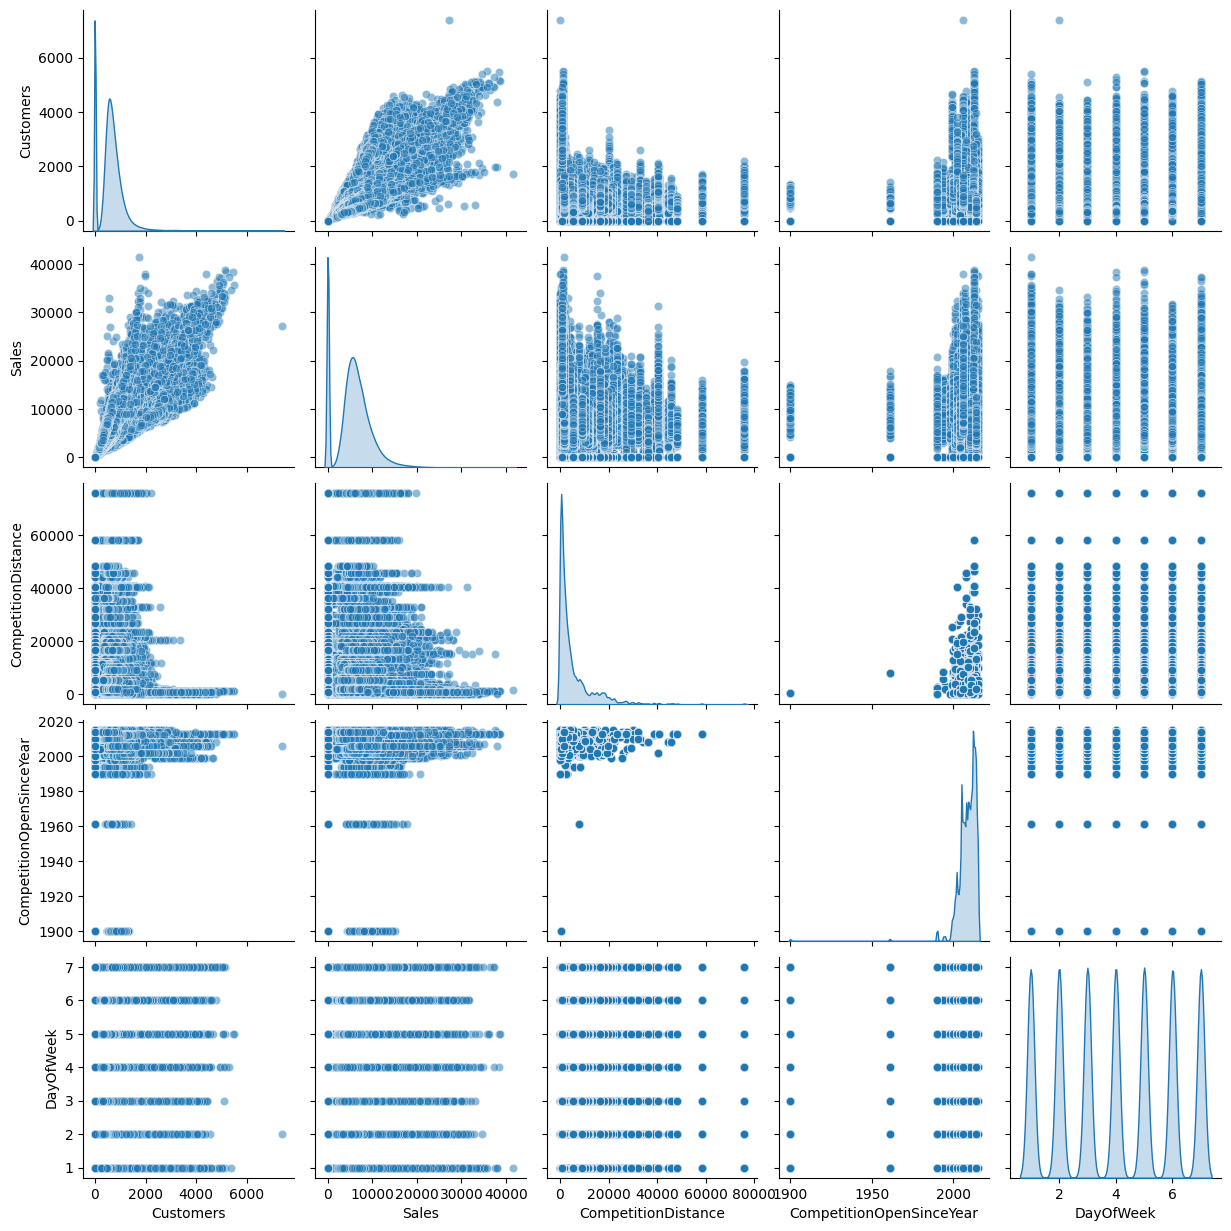

In [ ]:
# Select column for pairplot
selected_columns = ['Customers', 'Sales', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'DayOfWeek', 'Date']

sns.pairplot(df_merged[selected_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, StoreType

1. **Beziehung zwischen Customers und Sales**

	- Zwischen den StoreType-Kategorien selbst, zeigen sich unterschiedliche Dichten und Verteilungen:
		- StoreType b (rot) hat im Vergleich zu den anderen Stores, eine höheren Umsatz und eine höhere Anazhl an Kunden
		- StoreType a (orange) ist breiter verteilt als die anderen, dennoch gibt es Stores mit hohen Umsätzen trotz relativ weniger Kunden.
		- StoreType d (grün) weist auch eine positive Korrelation auf, dabei sind die Umsätze und Kunden geringer verteilt und im Vergleich zu den den anderen beiden Typen.
		- StoreType c (blau) zeigt eine breitere Verteilung der Umsätze und Kunden, was auf eine größere Varianz in der Geschäftstätigkeit hinweist.
	

2. **Verteilungen**

	- Diagonale KDE-Plots: Die diagonalen Plots zeigen die Kernel-Density-Estimates (KDE) der Verteilungen für Customers und Sales innerhalb der einzelnen StoreType-Kategorien.
		- Customers:
			- StoreType a (orange) weist eine bimodale Verteilung auf, d.h., dass es zwei Hauptgruppen von Geschäften gibt (niedrige und mittlere Kundenzahl).
			- StoreType b (rot) weist eine breite Verteilung mit einem Maximum bei ca. 2500 Kunden.
			- StoreType c (blau) weist ebenfalls eine breite Verteilung mit mehreren Spitzen auf --> große Varianz in der Kundenanzahl.
			- StoreType d (grün) weist eine gleichmäßige Verteilung auf niedrigere Kundenanzahlen auf.
		- Sales:
			- StoreType a (orange) weist eine breite Verteilung mit Maximas bei niedrigen und mittleren Umsätzen.
			- StoreType b (rot) weist Maximas auf, was auf höhere Umsätze in dieser Kategorie hinweist.
			- StoreType c (blau) weist eine breite Verteilung mit mehreren Maximas auf, ähnlich wie bei der Kundenanzahl.
			- StoreType d (grün) zeigt eine weniger ausgeprägte Verteilung mit moderaten Umsätzen.

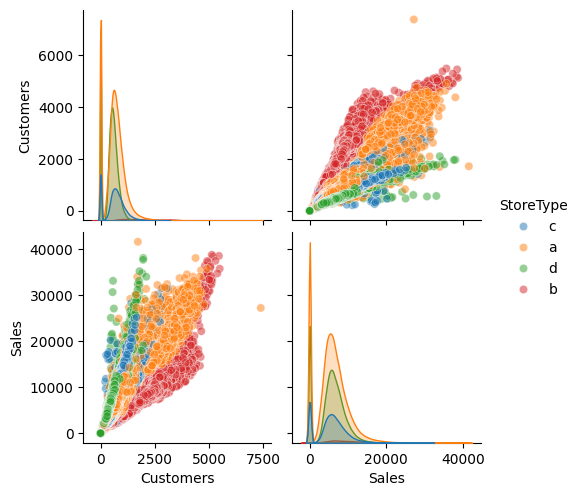

In [53]:
selected_columns = ['Customers', 'Sales', 'StoreType']

sns.pairplot(df_merged[selected_columns], hue='StoreType', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()


## Pairplot Customers, Sales, Assortment

1. **Beziehung zwischen Customers und Sales**
	- Punktewolken für die versch. Assortment Kategorien überlappen sich, weisen aber unterschiedliche Dichten und Verteilungen:
		- Assortment a (blau) zeigt tendenziell eine geringere Anzahl an Kunden und Umsätzen im Vergleich zu den anderen Kategorien.
		- Assortment b (grün) weist moderate Anzahl an Kunden und Umsätzen
		- Assortment c (orange) weist eine breite Verteilung der Kunden und Umsätze und tendiert zu höheren Werten in beiden Dimensionen.

2. **Verteilungen**
	- diagonalen Plots zeigen die KDE der Verteilungen für Customer und Sales
		- Customers:
			- Assortment a (blau) zeigt eine spitze Verteilung mit hoher Anzahl an Geschäften mit sehr wenigen Kunden und einige mit moderaten Anzahl an Kunden.
			- Assortment b (grün) gleichmäßig verteilt, mit Maximum bei mittlerer Kundenanzahl.
			- Assortment c (orange) ist breit verteilt und dabei niedrige und hohe Kundenanzahlen umfasst.
		- Sales:
			- Assortment a (blau) konzentriert sich auf niedrige Umsätze.
			- Assortment b (grün) ist gleichmäßig verteilt und tendiert zu mittleren Umsätzen.
			- Assortment c (orange) ist breit verteilt und umfasst höhere Umsätze, die auf eine größere Varianz in der Geschäftstätigkeit hinweist.

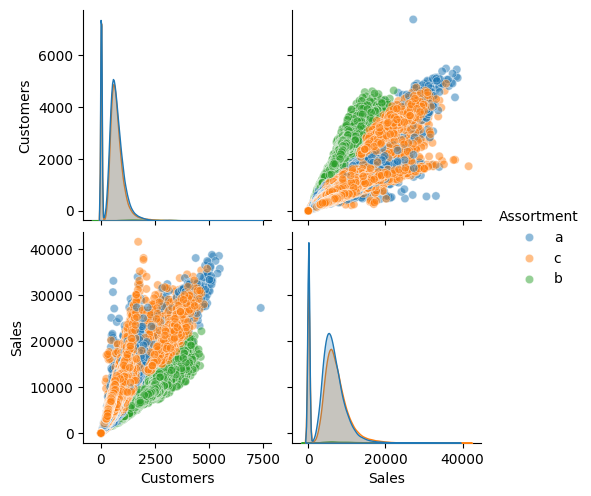

In [54]:
selected_columns = ['Customers', 'Sales', 'Assortment']

sns.pairplot(df_merged[selected_columns], hue='Assortment', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, Promo2

	- Blau: 0 (kein Promo2)
	- Orange: 1 (Promo2)

Hier sind die wichtigsten Beobachtungen und deren Bedeutung:

1. **Beziehung zwischen Customers und Sales**
	- Punktewolken für die versch. Promo2 Kategorien überlappen sich, weisen aber unterschiedliche Dichten und Verteilungen:
		- keine Promo2 (blau): meisten Datenpunkte sind blau, d.h. Mehrheit der Geschäfte nehmen nicht an Promo2 teil.
		- mit Promo2 (orange): orangenen Punkte sind entlang der postiven Korrelation verteilt. Es gibt eine sichtbare Trennung der Dichte und Verteilung.

2. **Verteilungen**
	- diagonale Plots zeigen KDE der Verteilungen für Customers und Sales innerhalb der einzelnen Promo2-Kategorien.
		- Customers:
			- kein Promo2 (blau) zeigt spitze Verteilung mit großer Anzahl an Stores mit sehr wenigen Kunden und einige mit moderaten Anzahl.
			- mit Promo2 (orange), ähnliche Verteilung, aber geringere Dichte bei sehr wenigen Kunden.
		- Sales:
			- kein Promo2 (blau), zeigt Verteilung die sich stark auf niedrige Umsätze konzentriert, wobei einige Stores, sehr hohe Umsätze erzielen.
			- mit Promo2 (orange), breit verteilt mit hohen Maximas bei mittleren und hohen Umsätzen.

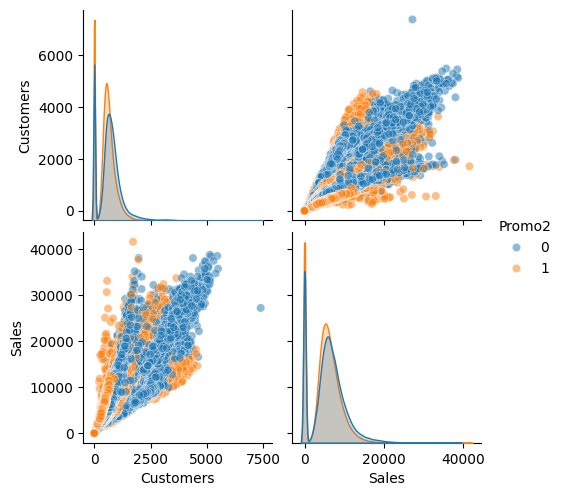

In [55]:
selected_columns = ['Customers', 'Sales', 'Promo2']

sns.pairplot(df_merged[selected_columns], hue='Promo2', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, PromoInterval

	- Blau: Jan,Apr,Jul,Oct
	- Orange: Feb,May,Aug,Nov
	- Grün: Mar,Jun,Sept,Dec

1. **Beziehung zwischen Customers und Sales**
	- Punktewolken für die versch. PromoIntervall-Kategorien überlappen sich, weisen aber unterschiedliche Dichten und Verteilungen:
		- Jan,Apr,Jul,Oct (blau) zeigt die meisten Datenpunkte, d.h., dass die Intervalle häufiger oder intensiver genutzt werden.
		- Feb,May,Aug,Nov (orange) und Mar,Jun,Sept,Dec (grün) zeigen weniger Datenpunkte, sind aber auch gut verteilt entlang der positiven Korrelation.

2. **Verteilungen**
	- 	diagonale Plots zeigen KDE der Verteilungen für Customers und Sales innerhalb der einzelnen PromoInterval-Kategorien.
		- Customers:
			- Jan,Apr,Jul,Oct (blau) zeigt spitze Verteilung mit einer großen Anzahl an Stores mit sehr wenigen Kunden und einige mit einer moderaten Anzahl an Kunden.
			- Feb,May,Aug,Nov (orange) zeigt eine ähnliche Verteilung wie die blaue Kategorie, jedoch mit einer geringeren Dichte.
			- Mar,Jun,Sept,Dec (grün) ist breit verteilt und die eine größere Varianz in der Kundenanzahl umfasst.
		- Sales:
			- bei Jan,Apr,Jul,Oct (blau) ist die Verteilung stark auf niedrige Umsätze konzentriert, mit einigen Stores, die sehr hohe Umsätze erzielen.
			- bei Feb,May,Aug,Nov (orange) liegt eine ähnliche Verteilung wie die blaue Kategorie auf, jedoch mit einer geringeren Dichte.
			- Mar,Jun,Sept,Dec (grün) ist breit verteilt und umfasst höhere Umsätze, was auf eine größere Varianz in der Geschäftstätigkeit hinweist.

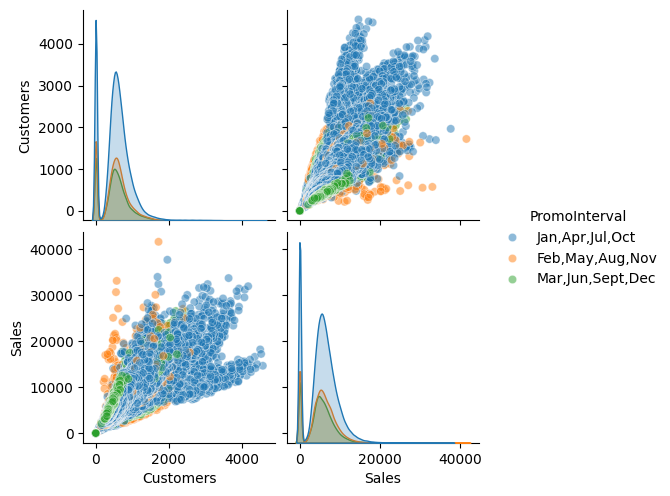

In [56]:
selected_columns = ['Customers', 'Sales', 'PromoInterval']

sns.pairplot(df_merged[selected_columns], hue='PromoInterval', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, DayOfWeek

	- 1: Montag (sehr hellrosa)
	- 2: Dienstag (hellrosa)
	- 3: Mittwoch (rosa)
	- 4: Donnerstag (lila)
	- 5: Freitag (dunkler lila)
	- 6: Samstag (sehr dunkel lila)
	- 7: Sonntag (dunkelviolett)

Hier sind die wichtigsten Beobachtungen und deren Bedeutung:

1. **Beziehung zwischen Customers und Sales**
	- Punktewolken für die versch. DayOfWeek-Kategorien überlappen sich, weisen aber unterschiedliche Dichten und Verteilungen:
		- Mittwoch, Donnerstag, Freitag und Samstag (rosa, lila, dunkler lila und sehr dunkel lila) zeigen höhere Kunden- und Umsatzwerte.
		- Montag, Dienstag und Sonntag (sehr hellrosa, hellrosa und dunkelviolett) zeigen eine geringere Dichte und Verteilung der Kunden- und Umsatzwerte.

2. **Verteilungen**
	- diagonale Plots zeigen KDE der Verteilungen für Customers und Sales innerhalb der einzelnen DayOfWeek-Kategorien.
		- Customers:
			- Zeigt eine spitze Verteilung mit einer großen Anzahl an Stores mit sehr wenigen Kunden an den meisten Wochentagen.
			- Samstag (sehr dunkel lila) ist breit verteilt, d.h., dass an diesem Tag mehr Kunden einkaufen.
		- Sales:
			- Zeigt eine Verteilung, die sich stark auf niedrige Umsätze konzentriert, mit einigen Stores, die sehr hohe Umsätze erzielen.
			- Freitag und Samstag (dunkler lila und sehr dunkel lila) zeigen breitere Verteilungen, was auf höhere Umsätze an diesen Tagen hinweist.

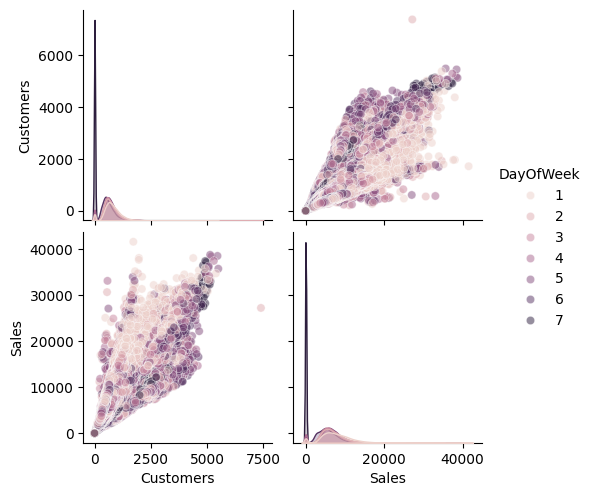

In [57]:
selected_columns = ['Customers', 'Sales', 'DayOfWeek']

sns.pairplot(df_merged[selected_columns], hue='DayOfWeek', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, Open

	- Blau: 0 (geschlossen)
	- Orange: 1 (geöffnet)

Hier sind die wichtigsten Beobachtungen und deren Bedeutung:

1. **Beziehung zwischen Customers und Sales**
	- Zwischen der Anzahl der Kunden und dem Umsatz ist eine positive Korrelation erkennbar, wenn der Store geöffnet ist (orange Punkte). Demnach gilt, dass ein Anstieg der Kundenzahl mit einem Anstieg des Umsatzes einhergeht.
	- Geschlossene Geschäfte (blau): Die blauen Punkte zeigen, dass wenn der Store geschlossen ist, es keine Kunden und keinen Umsatz gibt, was zu erwarten ist.

2. **Verteilungen**
	- diagonale Plots zeigen KDE der Verteilungen für Customers und Sales innerhalb der einzelnen Open-Kategorien.
		- Customers:
			- Geöffnet (orange): Zeigt eine spitze Verteilung mit einer großen Anzahl an Stores mit sehr wenigen Kunden und einige mit einer moderaten Anzahl an Kunden.
			- Geschlossen (blau): Zeigt keine Kunden, da der Store geschlossen ist.
		- Sales:
			- Geöffnet (orange): Zeigt eine Verteilung, die stark auf niedrige Umsätze konzentriert ist, mit einigen Geschäften, die sehr hohe Umsätze erzielen.
			- Geschlossen (blau): Zeigt keinen Umsatz, da das Geschäft geschlossen ist.

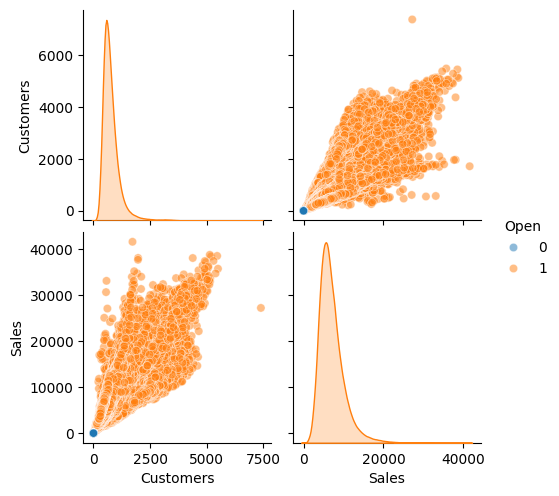

In [58]:
selected_columns = ['Customers', 'Sales', 'Open']

sns.pairplot(df_merged[selected_columns], hue='Open', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, Promo

	- Blau: 0 (keine Promotion)
	- Orange: 1 (Promotion)

Hier sind die wichtigsten Beobachtungen und deren Bedeutung:

1. **Beziehung zwischen Customers und Sales**
	- Positive Korrelation (mit und ohne Promotion): Es ist eine klare positive Korrelation zwischen der Anzahl der Kunden und dem Umsatz erkennbar, sowohl wenn Promotionen durchgeführt werden (orange) als auch wenn keine Promotionen durchgeführt werden (blau).
	- Punktewolken für die verschiedenen Promo-Kategorien überlappen sich stark, zeigen aber unterschiedliche Dichten und Verteilungen:
		- Keine Promotion (blau): Die blauen Punkte sind gut verteilt entlang der positiven Korrelation.
		- Mit Promotion (orange): Die orangefarbenen Punkte sind ebenfalls entlang der positiven Korrelation verteilt, jedoch gibt es eine sichtbare Trennung in der Dichte und Verteilung.

2. **Verteilungen**
	- diagonale Plots zeigen KDE der Verteilungen für Customers und Sales innerhalb der einzelnen Promo-Kategorien.
		- Customers:
			- Keine Promotion (blau): Zeigt eine spitze Verteilung mit einer großen Anzahl an Geschäften mit sehr wenigen Kunden und einige mit einer moderaten Anzahl.
			- Mit Promotion (orange): Zeigt eine ähnliche Verteilung, jedoch gibt es eine geringere Dichte bei sehr wenigen Kunden.
		- Sales:
			- Keine Promotion (blau): Zeigt eine Verteilung, die stark auf niedrige Umsätze konzentriert ist, mit einigen Geschäften, die sehr hohe Umsätze erzielen.
			- Mit Promotion (orange): Zeigt eine breitere Verteilung mit höheren Spitzen bei mittleren und hohen Umsätzen.


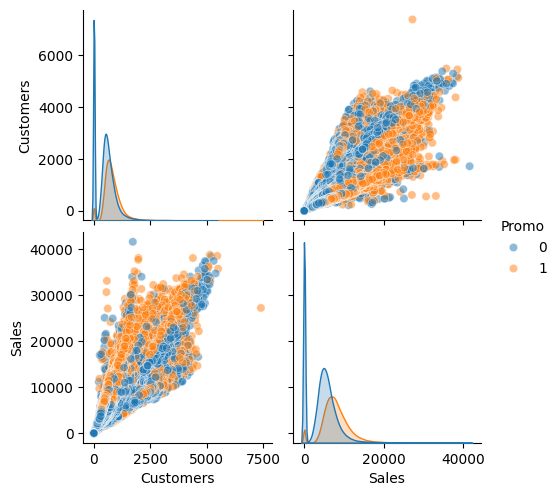

In [59]:
selected_columns = ['Customers', 'Sales', 'Promo']

sns.pairplot(df_merged[selected_columns], hue='Promo', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, StateHoliday

	- Blau: 0 (kein Feiertag)
	- Orange: a (öffentlicher Feiertag)
	- Grün: b (Osterferien)
	- Rot: c (Weihnachten)

1. **Beziehung zwischen Customers und Sales**
	- StateHoliday-spezifische Trends: Die meisten Datenpunkte sind blau (kein Feiertag), was darauf hinweist, dass die meisten Tage im Datensatz keine Feiertage sind.
	- Die wenigen Punkte in Orange (a), Grün (b) und Rot (c) scheinen sich hauptsächlich in den gleichen Bereichen zu konzentrieren wie die blauen Punkte, jedoch sind diese Kategorien viel seltener vertreten.

2. **Verteilungen**
	- diagonale Plots zeigen KDE der Verteilungen für Customers und Sales innterhalb der gesamten Daten ???? nicht StateHoliday?
		- Customers:
			- Zeigt eine spitze Verteilung mit einer großen Anzahl an Geschäften mit sehr wenigen Kunden und einige mit einer moderaten Anzahl.
		- Sales:
			- Zeigt eine Verteilung, die stark auf niedrige Umsätze konzentriert ist, mit einigen Geschäften, die sehr hohe Umsätze erzielen.


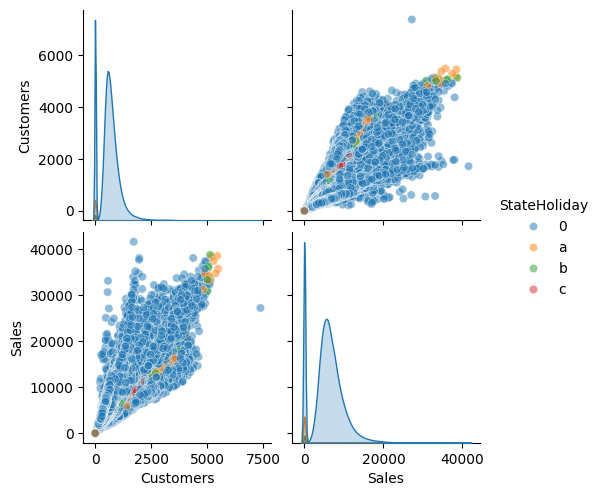

In [60]:
selected_columns = ['Customers', 'Sales', 'StateHoliday']

sns.pairplot(df_merged[selected_columns], hue='StateHoliday', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

## Pairplot Customers, Sales, SchoolHoliday

	- Blau: 0 (kein Schulferientag)
	- Orange: 1 (Schulferientag)

Hier sind die wichtigsten Beobachtungen und deren Bedeutung:

1. **Beziehung zwischen Customers und Sales**
	- Positive Korrelation (mit und ohne Schulferien): Es ist eine klare positive Korrelation zwischen der Anzahl der Kunden und dem Umsatz erkennbar, sowohl an Tagen ohne Schulferien (blau) als auch an den Tagen mit Schulferien (orange). Das bedeutet, dass ein Anstieg der Kundenanzahl mit einem Anstieg des Umsatzes einhergeht.
	- Punktewolken für die versch. SchoolHoliday-Kategorien überlappen sich stark, zeigen aber unterschiedliche Dichten und Verteilungen:
		- Keine Schulferien (blau): Die blauen Punkte sind gut verteilt entlang der positiven Korrelation.
		- Mit Schulferien (orange): Die orangefarbenen Punkte sind ebenfalls entlang der positiven Korrelation verteilt, jedoch gibt es eine sichtbare Trennung in der Dichte und Verteilung.

2. **Verteilungen**
	- diagonalen Plots zeigen KDE der Verteilungen für Customers und Sales innerhalb der einzelnen SchoolHoliday-Kategorien.
		- Customers:
			- Keine Schulferien (blau) weist eine spitze Verteilung mit einer großen Anzahl an Stores auf mit sehr wenigen Kunden und einige mit einer moderaten Anzahl.
			- Mit Schulferien (orange) zeigt eine ähnliche Verteilung, jedoch gibt es eine geringere Dichte bei sehr wenigen Kunden.
		- Sales:
			- Keine Schulferien (blau) zeigt eine Verteilung, die stark auf niedrige Umsätze konzentriert ist, mit einigen Geschäften, die sehr hohe Umsätze erzielen.
			- Mit Schulferien (orange) zeigt eine breitere Verteilung mit höheren Spitzen bei mittleren und hohen Umsätzen.

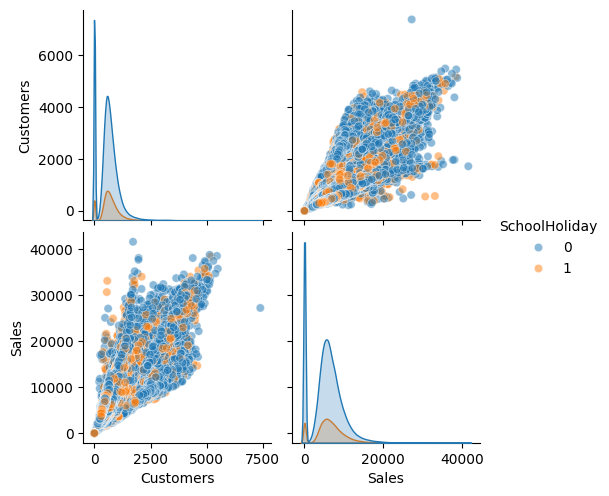

In [61]:
selected_columns = ['Customers', 'Sales', 'SchoolHoliday']

sns.pairplot(df_merged[selected_columns], hue='SchoolHoliday', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

# Fazit

Die deskriptive Analyse des Rossmann Store Sales Datensatzes zeigt, dass in dem Store- und Test-Datensatz fehlerhafte Werte vorliegen. Beim Test-Datensatz sind elf Werte in der Spalte Open fehlerhaft, während im Store-Datensatz 2.343 fehlerhafte Werte in den Spalten CompetitionDistance,CompetitionOpenSinceMonth, CompetitionDistanceYear, Promo2SinceWeek, Promo2SinceYear und PromoInterval vorliegen. Bevor die Modelle erstellt werden können, müssen diese fehlerhaften Werte bereinigt werden, um genaue Vorhersagen zu gewährleisten. Der Trainingsdatensatz beinhaltet über eine Million Einträge und stellt somit einen ausreichend großen Datensatz für die Erstellung von Regessionmodellen dar. 

Die Korrelationsmatrizen zeigen, dass die Verkaufszahlen stark positiv mit der Kundenanzahl und offenen Geschäftszeiten korreliert. Das bedeutet, dass offene Geschäfte und eine hohe Kundenanzahl zu mehr Umsatz führt. Ebenfalls weisen Tage ohne gesetzliche Feiertage höhere Verkaufszahlen als an gesetzlichen Feiertagen, an den Osterfeiertagen oder Weihnachtsfeiertagen auf. Die Schulferien hingegen haben einen geringen positiven Einfluss auf die Verkaufszahlen. Darüber hinaus beeinflusst der Wochentag die Verkaufszahlen, die Kundenanzahl, die offenen Geschäftszeiten und die Promotionen negativ. Der Typ und das Sortiment der Filiale korreliert mit den Verkaufszahlen, sodass mehr Kunden den Ladentyp b und das Sortiment b bevorzugen. Das Promotions-Intervall Jan, Apr, Jul, Oct wird öfter in den Filialen verwendet, um eine Promotion zu starten. 

